In [1]:
!pip install -U -q segmentation-models --user

from PIL import Image
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
!pip freeze

absl-py==0.15.0
accelerate==0.5.1
access==1.1.3
affine==2.3.0
aiobotocore==2.1.1
aiohttp @ file:///home/conda/feedstock_root/build_artifacts/aiohttp_1637087016127/work
aioitertools==0.10.0
aiosignal @ file:///home/conda/feedstock_root/build_artifacts/aiosignal_1636093929600/work
albumentations==1.1.0
alembic==1.7.6
allennlp==2.9.0
altair==4.2.0
annoy==1.17.0
ansiwrap==0.8.4
anyio @ file:///home/conda/feedstock_root/build_artifacts/anyio_1637703203932/work/dist
apache-beam==2.34.0
aplus==0.11.0
appdirs @ file:///home/conda/feedstock_root/build_artifacts/appdirs_1603108395799/work
argcomplete @ file:///home/conda/feedstock_root/build_artifacts/argcomplete_1619128689661/work
argon2-cffi @ file:///home/conda/feedstock_root/build_artifacts/argon2-cffi_1636021379047/work
arrow @ file:///home/conda/feedstock_root/build_artifacts/arrow_1635261338479/work
arviz==0.11.4
asgiref==3.5.0
asn1crypto @ file:///home/conda/feedstock_root/build_artifacts/asn1crypto_1595949944546/work
astropy==4.3.1
astu

In [3]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["SM_FRAMEWORK"] = "tf.keras"

import segmentation_models as sm
import matplotlib.pyplot as plt 
import tensorflow_io as tfio
import tensorflow as tf



exts = ('jpg', 'JPG', 'png', 'PNG', 'tif', 'gif', 'ppm')

Segmentation Models: using `tf.keras` framework.


In [4]:
print(tf. __version__) 
print(tfio. __version__)

2.6.2
0.21.0


# DRIVE

The dataset comes with pair of input retina image and target mask. Among all retina image, we will only use this dataset for a quick baseline. However, rest of the dataset can be replaces easily on this pipeline.


In [5]:
input_data = '/kaggle/input/dataset/new_data/new_data/train/image'
images = sorted(
    [
        os.path.join(input_data, fname)
        for fname in os.listdir(input_data)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)

images

['/kaggle/input/dataset/new_data/new_data/train/image/21_training_0.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/21_training_1.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/21_training_2.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/21_training_3.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/21_training_4.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/21_training_5.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_0.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_1.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_2.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_3.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_4.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_5.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/23_training_0.tif',
 '/kaggle/input/dataset/new_data/new_d

In [6]:
target_data = '/kaggle/input/dataset/new_data/new_data/train/mask'
masks = sorted(
    [
        os.path.join(target_data, fname)
        for fname in os.listdir(target_data)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)
masks

['/kaggle/input/dataset/new_data/new_data/train/mask/21_training_0.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/21_training_1.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/21_training_2.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/21_training_3.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/21_training_4.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/21_training_5.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_0.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_1.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_2.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_3.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_4.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_5.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/23_training_0.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mas

In [7]:
print("Number of samples:", len(images), len(masks))
for input_path, target_path in zip(images[:10], masks[:10]):
    print(input_path[-31:], "|", target_path[-34:])

Number of samples: 120 120
a/train/image/21_training_0.tif | _data/train/mask/21_training_0.gif
a/train/image/21_training_1.tif | _data/train/mask/21_training_1.gif
a/train/image/21_training_2.tif | _data/train/mask/21_training_2.gif
a/train/image/21_training_3.tif | _data/train/mask/21_training_3.gif
a/train/image/21_training_4.tif | _data/train/mask/21_training_4.gif
a/train/image/21_training_5.tif | _data/train/mask/21_training_5.gif
a/train/image/22_training_0.tif | _data/train/mask/22_training_0.gif
a/train/image/22_training_1.tif | _data/train/mask/22_training_1.gif
a/train/image/22_training_2.tif | _data/train/mask/22_training_2.gif
a/train/image/22_training_3.tif | _data/train/mask/22_training_3.gif


In [8]:
from sklearn.model_selection import train_test_split
IMAGE_SIZE = 512
BATCH_SIZE = 8

def read_files(image_path, mask=False):
    image = tf.io.read_file(image_path)
    if mask:
        image = tf.io.decode_gif(image) # out: (1, h, w, 3)
        image = tf.squeeze(image) # out: (h, w, 3)
        image = tf.image.rgb_to_grayscale(image) # out: (h, w, 1)
        image = tf.divide(image, 128)
        image.set_shape([None, None, 1])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = tf.cast(image, tf.int32)
    else:
        image = tfio.experimental.image.decode_tiff(image) # out: (h, w, 4)
        image = image[:,:,:3] # out: (h, w, 3)
        image.set_shape([None, None, 3])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = image / 255.
    return image

def load_data(image_list, mask_list):
    image = read_files(image_list)
    mask  = read_files(mask_list, mask=True)
    return image, mask

def data_generator(image_list, mask_list):
    dataset = tf.data.Dataset.from_tensor_slices((image_list, mask_list))
    dataset = dataset.map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE, drop_remainder=False)
    return dataset
################################################3
train_x, valid_x, train_y, valid_y = train_test_split(images, masks, test_size=0.2, random_state=42)
train_dataset = data_generator(train_x, train_y)
train_dataset
validation_dataset = data_generator(valid_x, valid_y)
validation_dataset

<BatchDataset shapes: ((None, 512, 512, 3), (None, 512, 512, 1)), types: (tf.float32, tf.int32)>

In [9]:
def visualize(**images):
    """PLot images in one row."""
    n = len(images) 
    plt.figure(figsize=(20, 20))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image, cmap='gray')
    plt.show()

(8, 512, 512, 3) (8, 512, 512, 1)
0 1
[0 1]


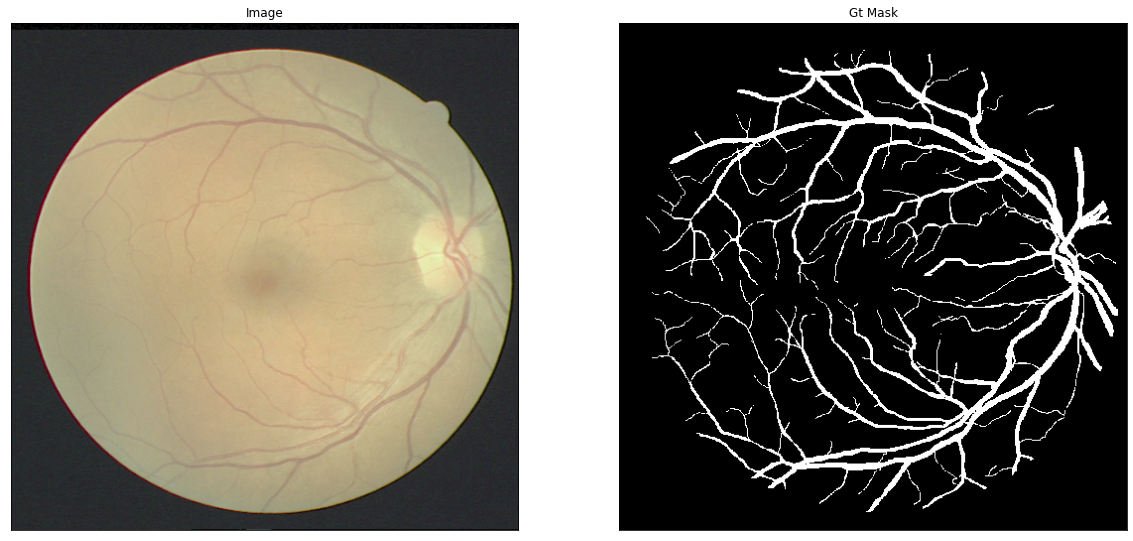

0 1
[0 1]


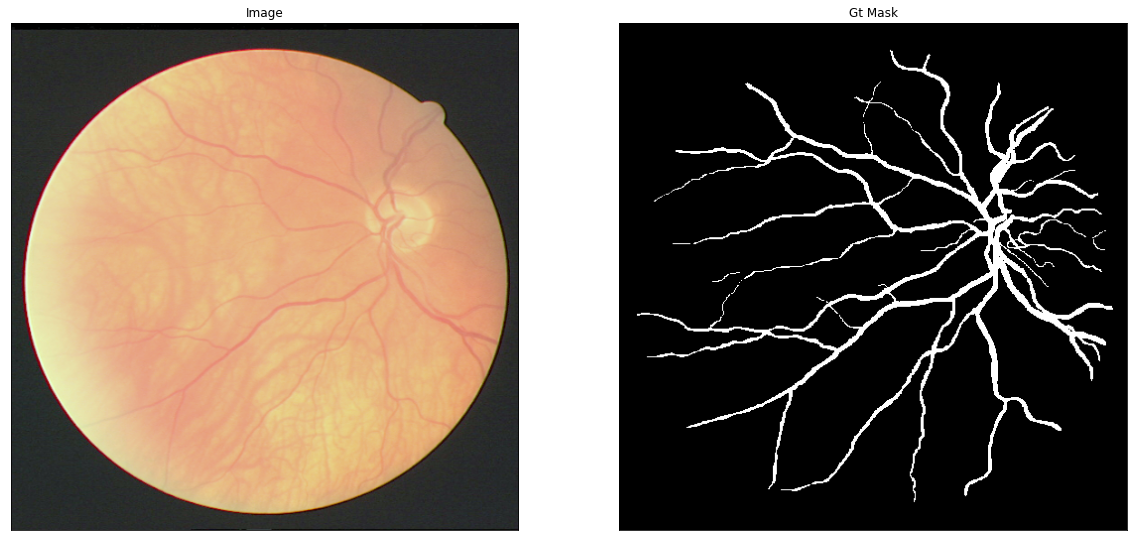

In [10]:
image, mask = next(iter(train_dataset.take(1))) 
print(image.shape, mask.shape)

for (img, msk) in zip(image[:2], mask[:2]):
    print(mask.numpy().min(), mask.numpy().max())
    print(np.unique(mask.numpy()))
    visualize(
        image=img.numpy(),
        gt_mask=msk.numpy(),
    )

# Model

In [11]:
from tensorflow import keras 

# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()
#improvement 1
BACKBONE   = 'vgg19'
n_classes  = 1 
activation = 'sigmoid' 
model9 = sm.Unet(BACKBONE, classes=n_classes, activation=activation)
model9.summary(line_length=110)

80150528/80134624 [==============================] - 1s 0us/step
Model: "model"
______________________________________________________________________________________________________________
Layer (type)                        Output Shape            Param #      Connected to                         
input_1 (InputLayer)                [(None, None, None, 3)] 0                                                 
______________________________________________________________________________________________________________
block1_conv1 (Conv2D)               (None, None, None, 64)  1792         input_1[0][0]                        
______________________________________________________________________________________________________________
block1_conv2 (Conv2D)               (None, None, None, 64)  36928        block1_conv1[0][0]                   
______________________________________________________________________________________________________________
block1_pool (MaxPooling2D)      

# Callback : Monitoring Training Progress

In [12]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
class DisplayCallback(keras.callbacks.Callback):
    def __init__(self, dataset, epoch_interval=5):
        self.dataset = dataset
        self.epoch_interval = epoch_interval
    
    def display(self, display_list, extra_title=''):
        plt.figure(figsize=(15, 15))
        title = ['Input Image', 'True Mask', 'Predicted Mask']

        if len(display_list) > len(title):
            title.append(extra_title)

        for i in range(len(display_list)):
            plt.subplot(1, len(display_list), i+1)
            plt.title(title[i])
            plt.imshow(display_list[i], cmap='gray')
            plt.axis('off')
        plt.show()
        
    def create_mask(self, pred_mask):
        pred_mask = (pred_mask > 0.5).astype("int32")
        return pred_mask[0]
    
    def show_predictions(self, dataset, num=1):
        for image, mask in dataset.take(num):
            pred_mask = model9.predict(image)
            self.display([image[0], mask[0], self.create_mask(pred_mask)])
        
    def on_epoch_end(self, epoch, logs=None):
        if epoch and epoch % self.epoch_interval == 0:
            self.show_predictions(self.dataset)
            print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

In [13]:
import os

# Define the directory to save the model
save_directory = '/kaggle/Models/'  # Change this to your desired directory

# Create the directory if it doesn't exist
os.makedirs(save_directory, exist_ok=True)




In [14]:
# Define a callback to save the best model weights
checkpoint_callback = ModelCheckpoint(
    os.path.join(save_directory, "model9.h5"), monitor="val_loss", save_best_only=True, save_weights_only=True, verbose=1
)

# Define a callback for early stopping
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=10, verbose=1)

# Define your DisplayCallback with the dataset and interval
display_callback = DisplayCallback(dataset=validation_dataset, epoch_interval=5)

# Compile and Fit

Epoch 1/250
12/12 [==============================] - 22s 598ms/step - loss: 0.9227 - dice_coefficient: 0.1759 - accuracy: 0.2525 - val_loss: 0.4476 - val_dice_coefficient: 0.1795 - val_accuracy: 0.8847

Epoch 00001: val_loss improved from inf to 0.44759, saving model to /kaggle/Models/model9.h5
Epoch 2/250
12/12 [==============================] - 7s 561ms/step - loss: 0.7499 - dice_coefficient: 0.2011 - accuracy: 0.4246 - val_loss: 0.3025 - val_dice_coefficient: 0.1852 - val_accuracy: 0.9117

Epoch 00002: val_loss improved from 0.44759 to 0.30249, saving model to /kaggle/Models/model9.h5
Epoch 3/250
12/12 [==============================] - 7s 560ms/step - loss: 0.6584 - dice_coefficient: 0.2157 - accuracy: 0.7329 - val_loss: 0.3062 - val_dice_coefficient: 0.2257 - val_accuracy: 0.9144

Epoch 00003: val_loss did not improve from 0.30249
Epoch 4/250
12/12 [==============================] - 7s 560ms/step - loss: 0.5949 - dice_coefficient: 0.2258 - accuracy: 0.8572 - val_loss: 0.3321 - val

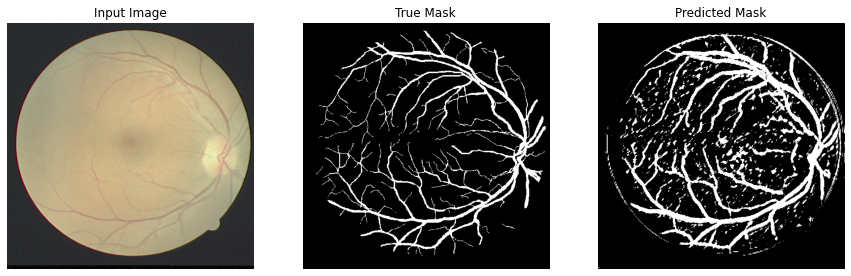


Sample Prediction after epoch 6

Epoch 7/250
12/12 [==============================] - 7s 559ms/step - loss: 0.4697 - dice_coefficient: 0.2527 - accuracy: 0.9336 - val_loss: 7.3013 - val_dice_coefficient: 0.1766 - val_accuracy: 0.1700

Epoch 00007: val_loss did not improve from 0.30249
Epoch 8/250
12/12 [==============================] - 7s 557ms/step - loss: 0.4482 - dice_coefficient: 0.2566 - accuracy: 0.9389 - val_loss: 0.6149 - val_dice_coefficient: 0.2311 - val_accuracy: 0.6535

Epoch 00008: val_loss did not improve from 0.30249
Epoch 9/250
12/12 [==============================] - 7s 560ms/step - loss: 0.4227 - dice_coefficient: 0.2636 - accuracy: 0.9427 - val_loss: 0.5996 - val_dice_coefficient: 0.2567 - val_accuracy: 0.7224

Epoch 00009: val_loss did not improve from 0.30249
Epoch 10/250
12/12 [==============================] - 7s 560ms/step - loss: 0.4009 - dice_coefficient: 0.2686 - accuracy: 0.9452 - val_loss: 0.5197 - val_dice_coefficient: 0.2598 - val_accuracy: 0.7140

Epoc

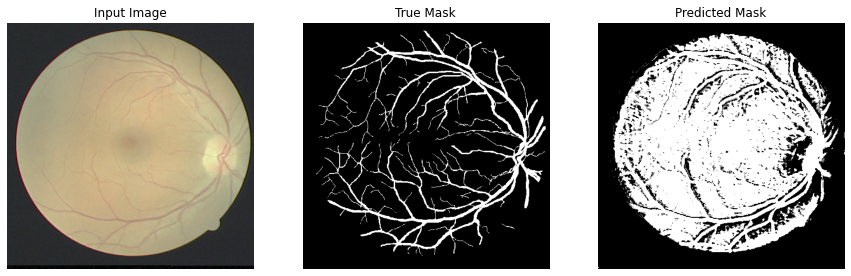


Sample Prediction after epoch 11

Epoch 12/250
12/12 [==============================] - 7s 563ms/step - loss: 0.3720 - dice_coefficient: 0.2793 - accuracy: 0.9463 - val_loss: 0.4930 - val_dice_coefficient: 0.2633 - val_accuracy: 0.8263

Epoch 00012: val_loss did not improve from 0.30249
Epoch 00012: early stopping


In [15]:
from tensorflow.keras.metrics import MeanIoU

# Define a function to calculate the Dice coefficient
def dice_coefficient(y_true, y_pred):
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    return (2.0 * intersection + 1e-5) / (union + 1e-5)
#################################################################

# define optomizer
optim = keras.optimizers.Adam(0.0001)
bce   = keras.losses.BinaryCrossentropy()
metrics = [dice_coefficient, "accuracy"]

# compile keras model with defined optimozer, loss and metrics
model9.compile(optim, bce, metrics)

'''history = model1.fit(
    train_dataset, 
    callbacks=[DisplayCallback(train_dataset)],
    epochs=250
)'''

history = model9.fit(
    train_dataset,
    epochs=250,
    validation_data=validation_dataset,
    callbacks=[checkpoint_callback, early_stopping_callback, display_callback]
)

In [16]:
test_data = '/kaggle/input/dataset/new_data/new_data/test/image'
test_images = sorted(
    [
        os.path.join(test_data, fname)
        for fname in os.listdir(test_data)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)

test_images

['/kaggle/input/dataset/new_data/new_data/test/image/01_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/02_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/03_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/04_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/05_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/06_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/07_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/08_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/09_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/10_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/11_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/12_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/13_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/14_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/15_test.t

In [17]:
test_mask = '/kaggle/input/dataset/new_data/new_data/test/mask'
test_masks = sorted(
    [
        os.path.join(test_mask, fname)
        for fname in os.listdir(test_mask)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)
test_masks

['/kaggle/input/dataset/new_data/new_data/test/mask/01_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/02_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/03_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/04_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/05_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/06_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/07_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/08_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/09_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/10_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/11_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/12_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/13_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/14_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/15_test.gif',
 '/kaggle/

In [18]:
print("Number of samples:", len(test_images), len(test_masks))
for test_path, mask_path in zip(test_images[:10], test_masks[:10]):
    print(test_path[-31:], "|", mask_path[-34:])

Number of samples: 20 20
new_data/test/image/01_test.tif | ata/new_data/test/mask/01_test.gif
new_data/test/image/02_test.tif | ata/new_data/test/mask/02_test.gif
new_data/test/image/03_test.tif | ata/new_data/test/mask/03_test.gif
new_data/test/image/04_test.tif | ata/new_data/test/mask/04_test.gif
new_data/test/image/05_test.tif | ata/new_data/test/mask/05_test.gif
new_data/test/image/06_test.tif | ata/new_data/test/mask/06_test.gif
new_data/test/image/07_test.tif | ata/new_data/test/mask/07_test.gif
new_data/test/image/08_test.tif | ata/new_data/test/mask/08_test.gif
new_data/test/image/09_test.tif | ata/new_data/test/mask/09_test.gif
new_data/test/image/10_test.tif | ata/new_data/test/mask/10_test.gif


In [19]:
IMAGE_SIZE = 512
BATCH_SIZE = 8

def read_files(image_path, mask=False):
    image = tf.io.read_file(image_path)
    if mask:
        image = tf.io.decode_gif(image) # out: (1, h, w, 3)
        image = tf.squeeze(image) # out: (h, w, 3)
        image = tf.image.rgb_to_grayscale(image) # out: (h, w, 1)
        image = tf.divide(image, 128)
        image.set_shape([None, None, 1])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = tf.cast(image, tf.int32)
    else:
        image = tfio.experimental.image.decode_tiff(image) # out: (h, w, 4)
        image = image[:,:,:3] # out: (h, w, 3)
        image.set_shape([None, None, 3])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = image / 255.
    return image

def load_data(image_list, mask_list):
    image = read_files(image_list)
    mask  = read_files(mask_list, mask=True)
    return image, mask

def data_generator(image_list, mask_list):
    dataset = tf.data.Dataset.from_tensor_slices((image_list, mask_list))
    dataset = dataset.map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE, drop_remainder=False)
    return dataset

test_dataset = data_generator(test_images, test_masks)
test_dataset

<BatchDataset shapes: ((None, 512, 512, 3), (None, 512, 512, 1)), types: (tf.float32, tf.int32)>

In [20]:
valid_dataset = test_dataset

In [21]:
test_masks = np.concatenate([y for x, y in valid_dataset], axis=0)
masks = test_masks.ravel()

In [22]:
test_imgs = np.concatenate([x for x, y in valid_dataset], axis=0)
predictions = model9.predict(test_imgs)
predictions.shape

(20, 512, 512, 1)

In [23]:
y_pred = predictions.ravel()
y_pred = (y_pred > 0.5).astype('int32')
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(masks, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.82      0.90   4784655
           1       0.32      0.85      0.46    458225

    accuracy                           0.83   5242880
   macro avg       0.65      0.84      0.68   5242880
weighted avg       0.93      0.83      0.86   5242880



In [25]:
def jaccard(target, prediction):
    intersection = np.logical_and(target, prediction)
    union = np.logical_or(target, prediction)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score
print('The Jaccard Score is: ', jaccard(y_pred, masks))


The Jaccard Score is:  0.30137548441241085


In [26]:
def my_dice(target, prediction):
 intersection = np.logical_and(target, prediction)
 union = np.logical_or(target, prediction)
 dice = (2*np.sum(intersection))/(np.sum(union)+np.sum(intersection))
 return dice
print('The Dice Score is: ', my_dice(y_pred, masks))

The Dice Score is:  0.4631645332530389


In [27]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(masks, y_pred)
print('The MCC Score is:', mcc)


The MCC Score is: 0.4516587471166701


In [28]:
from sklearn.metrics import roc_auc_score, roc_curve

# Assuming 'masks' and 'y_pred' are the true labels and predicted probabilities for the positive class.
fpr, tpr, thresholds = roc_curve(masks, y_pred)
auc = roc_auc_score(masks, y_pred)

print('The AUC Score is:', auc)


The AUC Score is: 0.838736095612845


(-0.5, 511.5, 511.5, -0.5)

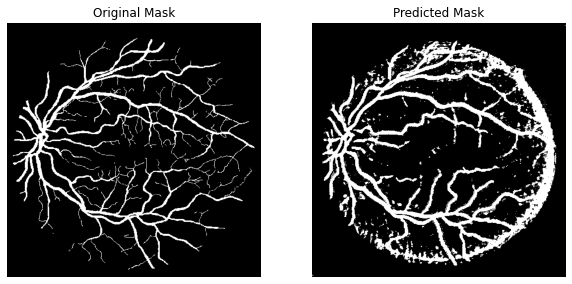

In [29]:
image = test_imgs[4]
mask = test_masks[4]
image = np.expand_dims(image, axis=0)
pred_mask = model9.predict(image)
pred_mask = (pred_mask > 0.5).astype('int32')
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Original Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title('Predicted Mask')
plt.imshow(pred_mask[0], cmap='gray')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

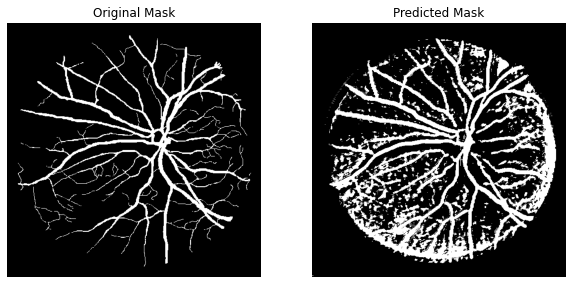

In [30]:
image = test_imgs[3]
mask = test_masks[3]
image = np.expand_dims(image, axis=0)
pred_mask = model9.predict(image)
pred_mask = (pred_mask > 0.5).astype('int32')
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Original Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title('Predicted Mask')
plt.imshow(pred_mask[0], cmap='gray')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

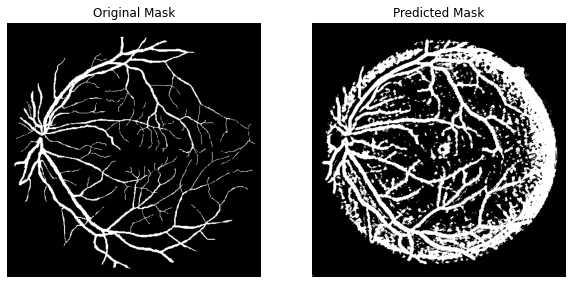

In [31]:
image = test_imgs[11]
mask = test_masks[11]
image = np.expand_dims(image, axis=0)
pred_mask = model9.predict(image)
pred_mask = (pred_mask > 0.5).astype('int32')
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Original Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title('Predicted Mask')
plt.imshow(pred_mask[0], cmap='gray')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

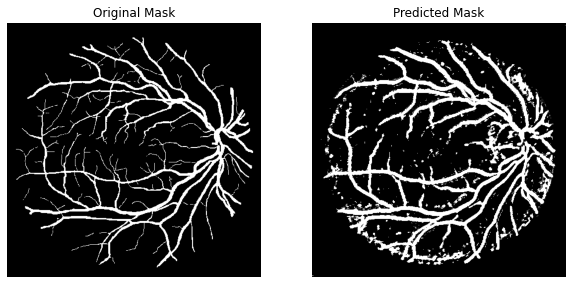

In [32]:
image = test_imgs[1]
mask = test_masks[1]
image = np.expand_dims(image, axis=0)
pred_mask = model9.predict(image)
pred_mask = (pred_mask > 0.5).astype('int32')
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Original Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title('Predicted Mask')
plt.imshow(pred_mask[0], cmap='gray')
plt.axis('off')